In [42]:
# !pip install tensorflow

# in Google colab, tenserflow is pre-installed, and therefore there is no need to install it
# however, if you're coding in Jupyter notebook, you will have to  install tensorflow library and import it

# https://www.tensorflow.org/install

In [43]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [44]:
# Load in the data
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer()

In [45]:
type(df)
# sklearn.utils._bunch.Bunch - This is like a dictionary - (key : value) pairs

sklearn.utils._bunch.Bunch

In [46]:
# print(df)

In [47]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [48]:
df.data.shape

(569, 30)

In [49]:
df.target.shape

(569,)

In [50]:
df.target_names
# 0 - malignant
# 1 - benign

array(['malignant', 'benign'], dtype='<U9')

In [51]:
len(df.feature_names)

30

In [52]:
df.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.33)

In [54]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((381, 30), (188, 30), (381,), (188,))

In [55]:
N, D = X_train.shape
# N = no of rows
# D = no of columns
print(N)
print(D)

381
30


In [56]:
X_train

array([[1.162e+01, 1.818e+01, 7.638e+01, ..., 1.416e-01, 2.660e-01,
        9.270e-02],
       [1.953e+01, 1.890e+01, 1.295e+02, ..., 1.980e-01, 2.968e-01,
        9.929e-02],
       [1.032e+01, 1.635e+01, 6.531e+01, ..., 2.381e-02, 2.681e-01,
        7.399e-02],
       ...,
       [1.519e+01, 1.321e+01, 9.765e+01, ..., 8.178e-02, 2.487e-01,
        6.766e-02],
       [1.134e+01, 2.126e+01, 7.248e+01, ..., 8.278e-02, 2.829e-01,
        8.832e-02],
       [1.044e+01, 1.546e+01, 6.662e+01, ..., 4.464e-02, 2.615e-01,
        8.269e-02]])

In [57]:
# Scale the data
# https://miro.medium.com/v2/resize:fit:720/1*LKyRy69Miqesmk-ZvMD8DA@2x.jpeg

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) # fit = study, transform = giving exam
X_test = sc.transform(X_test)

### Now the Tensorflow stuff...

In [58]:
# Build the model - Model1

# Way1
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input(shape=(D,)),
#     tf.keras.layers.Dense(1, activation="sigmoid")
# ])

# Way2
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation="sigmoid"))

In [59]:
# Build the model - Model2

# Way1
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input(shape=(D,)),
#     tf.keras.layers.Dense(5, activation="relu"),
#     tf.keras.layers.Dense(7, activation="relu"),
#     tf.keras.layers.Dense(2, activation="relu"),
#     tf.keras.layers.Dense(1, activation="sigmoid")
# ])

# Way2
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(64, input_shape=(D,), activation="relu"))
# model.add(tf.keras.layers.Dense(128, activation="relu"))
# model.add(tf.keras.layers.Dense(256, activation="relu"))
# model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [60]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [61]:
# Train the model for 100 epochs i.e. 100 times

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 27ms/step - loss: 0.5362 - accuracy: 0.8005 - val_loss: 0.4963 - val_accuracy: 0.8032
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.4905 - accuracy: 0.8215 - val_loss: 0.4553 - val_accuracy: 0.8298
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.4515 - accuracy: 0.8530 - val_loss: 0.4203 - val_accuracy: 0.8564
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.4185 - accuracy: 0.8740 - val_loss: 0.3908 - val_accuracy: 0.8670
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.3906 - accuracy: 0.8819 - val_loss: 0.3654 - val_accuracy: 0.8830
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3659 - accuracy: 0.8950 - val_loss: 0.3441 - val_accuracy: 0.8989
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.3452 - accuracy: 0.8950 - val_loss: 0.3251 - val_accuracy: 0.9043
Epoch 8/100


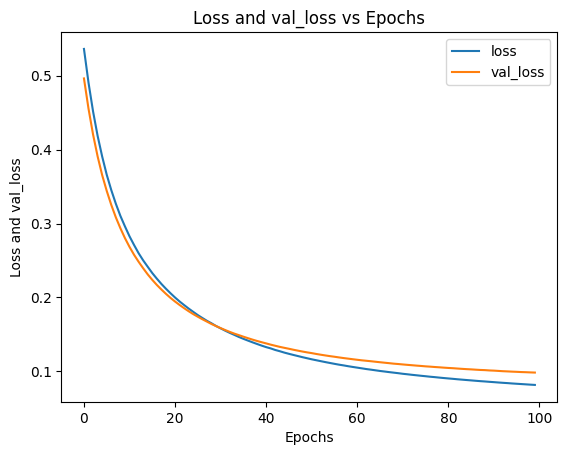

In [62]:
# Plot what is returned by model.fit()

import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label="loss")
plt.plot(r.history['val_loss'], label="val_loss")
plt.title("Loss and val_loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss and val_loss")
plt.legend()
plt.show()

There is a steady decrease in the loss per iteration as expected.

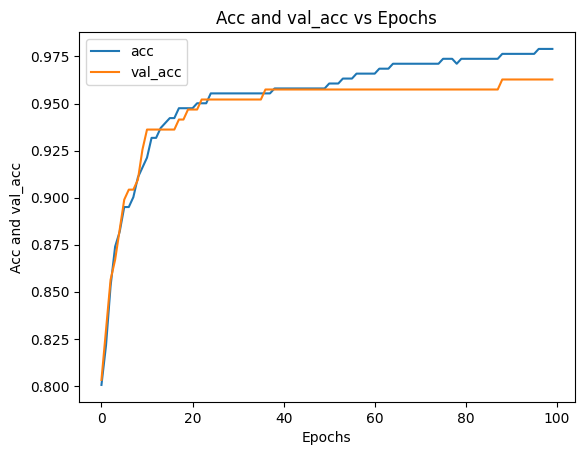

In [63]:
# Plot the accuracy too

import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label="acc")
plt.plot(r.history['val_accuracy'], label="val_acc")
plt.title("Acc and val_acc vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Acc and val_acc")
plt.legend()
plt.show()

We see a steady increase at each iteration.

### Make Predictions

In [67]:
X_test

array([[ 1.55380544,  1.27787892,  1.52645635, ...,  0.84423029,
         0.64526405,  0.01264719],
       [-0.99727982, -0.99761788, -1.02324466, ..., -1.75420234,
        -0.3146607 , -1.21548221],
       [ 0.24333557, -0.71460724,  0.27734198, ...,  0.3806531 ,
        -0.50825897, -0.35349656],
       ...,
       [-0.60888897, -1.11629976, -0.59566008, ..., -0.77183878,
        -0.2549679 , -0.07488572],
       [-0.86595342,  0.66621077, -0.86112729, ..., -0.79209216,
         0.42585268, -0.21846104],
       [ 1.52586365,  0.39461186,  1.51024462, ...,  1.89140464,
         1.14216627,  0.1690322 ]])

In [68]:
import numpy as np
y_pred = np.round(model.predict(X_test)).flatten()
y_pred

6/6 [==============================] - 0s 2ms/step


array([0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       0.], dtype=float32)

In [71]:
# Calculate the accuracy, compare it to evaluate() output

print("Manually calculated accuracy:",np.mean(y_pred == y_test) )
print("Evaluate output:",model.evaluate(X_test, y_test) )

Manually calculated accuracy: 0.9627659574468085
6/6 [==============================] - 0s 3ms/step - loss: 0.0983 - accuracy: 0.9628
Evaluate output: [0.09831546992063522, 0.9627659320831299]


In [72]:
model

### Saving the model

In [73]:
model.save("linearclassifier.keras")

In [74]:
md = tf.keras.models.load_model("/content/linearclassifier.keras")
print(md.layers)

In [75]:
md.evaluate(X_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.0983 - accuracy: 0.9628


[0.09831546992063522, 0.9627659320831299]

In [78]:
from google.colab import files
files.download("/content/linearclassifier.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Happy Learning